In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, FuncFormatter

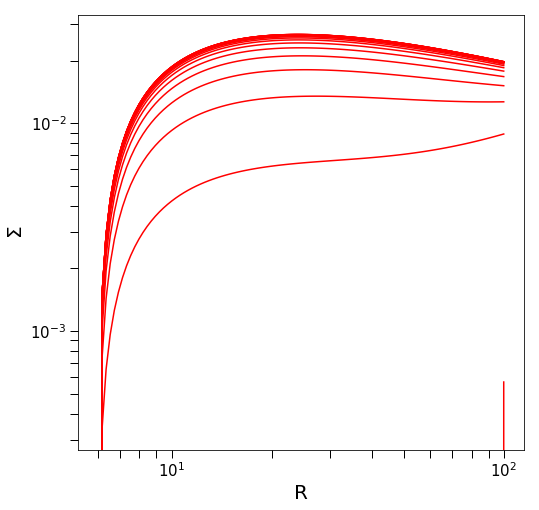

In [2]:
# part 1
# Σ - logR

nx = 100
nt = 10**6 #steps in time 
dt = 1.0

Rin = 6.0
Rout = 100
R = np.logspace(np.log10(Rin), np.log10(Rout), nx)
dR = R[1:] - R[:-1]
dR = np.insert(dR, 0, 0) 

nu_R = 1.0*(R/Rin)**(0.5)

Mdot = np.zeros(nx)
S = np.zeros(nx)

Mdot[-1] = 1.0
cmax = 0.5

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

for i in range(0, nt):
    
    S[np.where(S<0)] = 0.0
    # integrating using the forward difference method
    S[1:] += (1/(2*np.pi*R[1:])) * (dt/dR[1:]) * (Mdot[1:] - Mdot[:-1])

    forw_diff = np.sqrt(R) * nu_R * S
    
    Mdot[:-1] = 6*np.pi*np.sqrt(R[:-1]) * (forw_diff[1:] - forw_diff[:-1]) /dR[1:]
    
    # CFL condition
    index_cond = np.flatnonzero(S)
    cfl = max(((Mdot[index_cond-1]-Mdot[index_cond]) * (dt/(dR[index_cond]*2*np.pi*R[index_cond]*S[index_cond]))),default=0.01)
    
    if (cfl > cmax):
        dt = 0.9 * dt * cmax / cfl   
        
    # plot in time steps (from tutorial 1)
    if (i % 50000 == 0):    
        ax.plot(R,S,color='red')

ax.tick_params(which='major', width=1,length=8,labelsize=15)
ax.tick_params(which='minor', width=1,length=8,labelsize=15,pad=10)
ax.set_xlabel('R',fontsize=20)
ax.set_ylabel('$\Sigma$',fontsize=20)
ax.set_yscale('log')
ax.set_xscale('log')
  
plt.show()

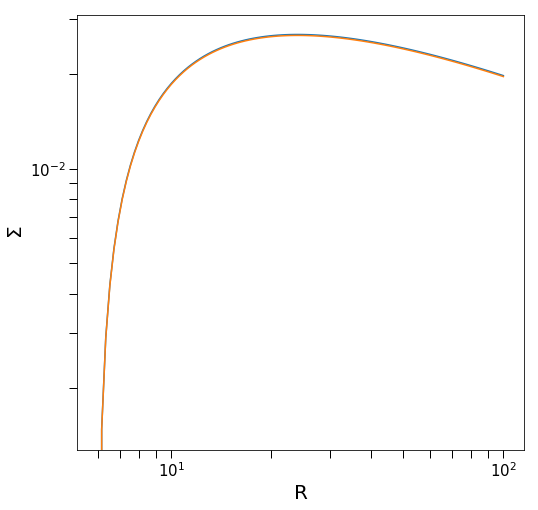

In [22]:
# plotting

fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.plot(R, S)
ax.plot(R, Mdot[-1]/(3*np.pi*nu_R) * (1-np.sqrt(Rin/R)))
ax.tick_params(which='major', width=1,length=8,labelsize=15)
ax.tick_params(which='minor', width=1,length=8,labelsize=15,pad=10)
ax.set_xlabel('R',fontsize=20)
ax.set_ylabel('$\Sigma$',fontsize=20)
ax.set_yscale('log')
ax.set_xscale('log')

plt.show()

In [23]:
# part 2 - adding perturbation

def perturb(t_fin, dt):

    S0 = S.copy()
    S0[50] += 0.1*S0[50] # perturbation
    Mdot0 = Mdot.copy() # save the steady state variables

    t = 0
    while t<=1*t_fin :

        S0[np.where(S0<0)] = 0.0
        S0[1:] += (1/(2*np.pi*R[1:])) * (dt/dR[1:]) * (Mdot0[1:] - Mdot0[:-1])

        forw_diff = np.sqrt(R) * nu_R * S0

        Mdot0[:-1] = 6*np.pi*np.sqrt(R[:-1]) * (forw_diff[1:] - forw_diff[:-1]) /dR[1:]

        # CFL condition
        index_cond = np.flatnonzero(S0)
        cfl = max(((Mdot0[index_cond-1]-Mdot0[index_cond]) * (dt/(dR[index_cond]*2*np.pi*R[index_cond]*S0[index_cond]))),default=0.01)

        t+=dt

        if (cfl > cmax):
            dt = 0.9 * dt * cmax / cfl
            print(dt)
        
    return S0

In [41]:
tau = 0.002
t_f = tau*R[50]**2/(12*nu_R[50]) # viscous timescale from equation on FKR, p.98
S1 = perturb(t_f, dt)

tau = 0.008
t_f = tau*R[50]**2/(12*nu_R[50])
S2 = perturb(t_f, dt)

tau = 0.032
t_f = tau*R[50]**2/(12*nu_R[50])
S3 = perturb(t_f, dt)

tau = 0.128
t_f = tau*R[50]**2/(12*nu_R[50])
S4 = perturb(t_f, dt)

tau = 0.512
t_f = tau*R[50]**2/(12*nu_R[50])
S5 = perturb(t_f, dt)

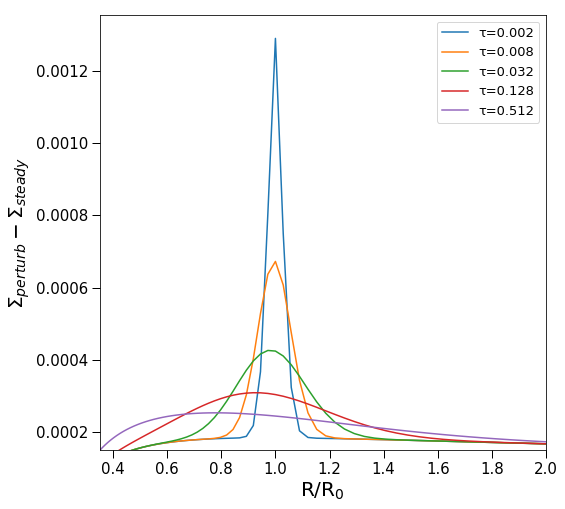

In [42]:
# plotting

fig, ax = plt.subplots(1,1, figsize=(8,8))
# plotting subtracting the theoretical steady state from the perturbed sigma
ax.plot(R/R[50], S1-Mdot[-1]/(3*np.pi*nu_R) * (1-np.sqrt(Rin/R)), label='τ=0.002')
ax.plot(R/R[50], S2-Mdot[-1]/(3*np.pi*nu_R) * (1-np.sqrt(Rin/R)), label='τ=0.008')
ax.plot(R/R[50], S3-Mdot[-1]/(3*np.pi*nu_R) * (1-np.sqrt(Rin/R)), label='τ=0.032')
ax.plot(R/R[50], S4-Mdot[-1]/(3*np.pi*nu_R) * (1-np.sqrt(Rin/R)), label='τ=0.128')
ax.plot(R/R[50], S5-Mdot[-1]/(3*np.pi*nu_R) * (1-np.sqrt(Rin/R)), label='τ=0.512')

ax.tick_params(which='major', width=1,length=8,labelsize=15)
ax.tick_params(which='minor', width=1,length=8,labelsize=15,pad=10)
ax.set_xlabel('R/R$_{0}$',fontsize=20)
ax.set_ylabel('$\Sigma_{perturb}-\Sigma_{steady}$',fontsize=20)

ax.set_xlim(0.35,2)
ax.set_ylim(0.00015)
plt.legend(prop={'size': 13})

plt.show()

In [20]:
# part 3, sin variation

def sin_per(Sn, nu_var, dt, a):

    nu_0 = nu_var[50]
    Mdot_n = np.zeros(S.shape)
    Mdot_n[-1] = 1

    t_visc = R[50]**2/(12*nu_0)

    Mdot1 = []
    Mdotp = []
    t1 = []

    t_fin = a*t_visc
    t = 0

    while t <= t_fin :

        nu_var[50] = nu_0 * (0.1*np.sin(2*np.pi * t/t_visc) + 1) # fluctuation

        forw_diff = np.sqrt(R) * nu_var * Sn
        Mdot_n[:-1] = 6*np.pi*np.sqrt(R[:-1]) * (forw_diff[1:] - forw_diff[:-1]) /dR[1:]
        Sn[np.where(Sn<0)] = 0.0
        Sn[1:] += (1/(2*np.pi*R[1:])) * (dt/dR[1:]) * (Mdot_n[1:] - Mdot_n[:-1])

        t+=dt

        Mdot1.append(Mdot_n[0])
        Mdotp.append(Mdot_n[50])
        t1.append(t)

        # CFL condition
        index_cond = np.flatnonzero(Sn)
        cfl = max(((Mdot_n[index_cond-1]-Mdot_n[index_cond]) * (dt/(dR[index_cond]*2*np.pi*R[index_cond]*Sn[index_cond]))),default=0.01)    
        if (cfl > cmax):
            dt = 0.9 * dt * cmax / cfl
            print(dt)
            
    return Mdot1, Mdotp, t1

mdot_in, mdot_p, t1 = sin_per(S.copy(),nu_R.copy(), 0.001, 6)

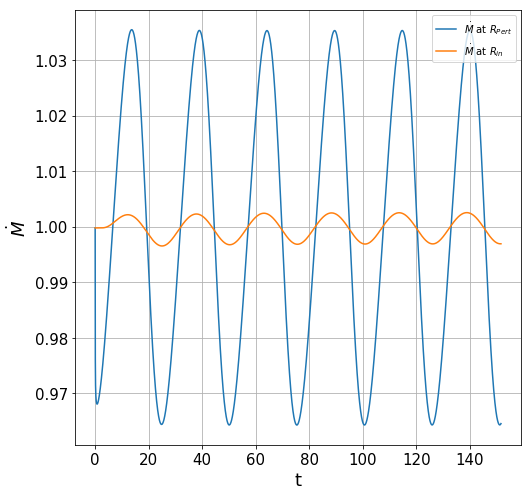

In [23]:
plt.figure(1,figsize=(8, 8))

mdot_p = np.array(mdot_p)
mdot_in = np.array(mdot_in)

plt.plot(t1, mdot_p, label=r'$\dot{M}$ at $R_{Pert}$')
plt.plot(t1, mdot_in, label=r'$\dot{M}$ at $R_{in}$')
plt.xlabel('t', fontsize=18)
plt.ylabel('$\dot{M}$', fontsize=18)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.grid(True)

plt.legend()
plt.show()

In [24]:
# Damped Random Walk

def DRW(R,delta_R,sigma,nu_org,dt,clf_max):
    nu = nu_org.copy()
    place = int(R.shape[0]*0.5)
    nu_p = nu[place]
    t_visc = R**2 /(12*nu_p)
    t_final = 4*t_visc[place]
    t_s = t_visc[place]
    
    m_dot = np.zeros(sigma.shape)
    m_dot[-1] = 1
    m_dotin, m_dotper, tijd = [],[],[]
    counter,time = 0,0
    chi = 1
    tau = 2
    mu = 1
    variance = 0.1
    s = np.sqrt(2.0*variance/tau)
    
    while time <= t_final:
        dchi =  s*np.random.random()*dt**(1/2) -(1./tau)*(chi - mu)*dt # DRW from HEA tutorial 3
        chi += dchi
        nu[place] = nu_p*chi
        for_dif = np.sqrt(R) * sigma * nu
        m_dot[:-1] = 6*np.pi*np.sqrt(R[:-1])*(for_dif[1:] - for_dif[:-1])/delta_R[1:]
        sigma[sigma<0.] = 0.0
        sigma[1:] += (dt/(2.*np.pi*R[1:])) *((m_dot[1:]-m_dot[:-1])/delta_R[1:])
        time +=dt

        m_dotin.append(m_dot[0])
        m_dotper.append(m_dot[place])
        tijd.append(time)


        index_cond = np.flatnonzero(sigma)
        clf = max((m_dot[index_cond-1]*dt)/(R[index_cond]*sigma[index_cond]*2*np.pi*delta_R[index_cond]),default =0.01)

        if clf > clf_max:
            counter += 1
            dt = 0.9*clf_max*dt/clf

    return sigma,m_dot,m_dotin,m_dotper,tijd

In [25]:
dt = 0.001
sigma_n,m_dot,m_dotin,m_dotper,tijd = DRW(R,dR,S.copy(),nu_R,dt,cmax)

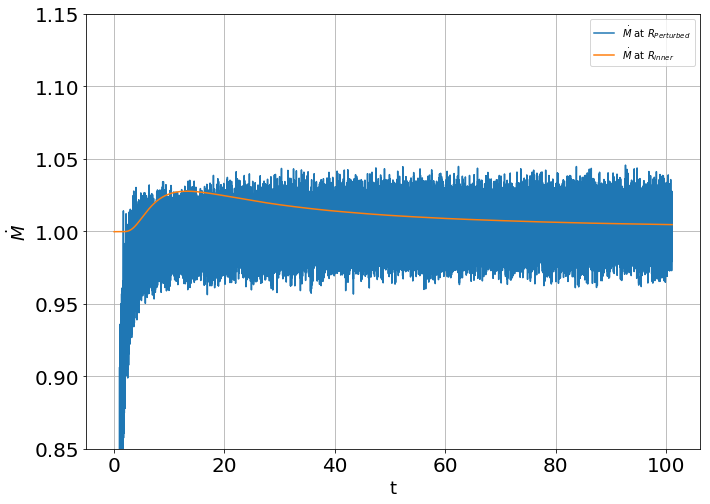

In [31]:
plt.figure(1,figsize=(11, 8))
plt.plot(tijd,m_dotper,label=r'$\dot{M}$ at $R_{Perturbed}$')
plt.plot(tijd,m_dotin,label=r'$\dot{M}$ at $R_{inner}$')

plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)
plt.xlabel('t', fontsize=18)
plt.ylabel('$\dot{M}$', fontsize=18)
#plt.xlim(10)
plt.ylim(0.85,1.15)
plt.legend()
plt.show()

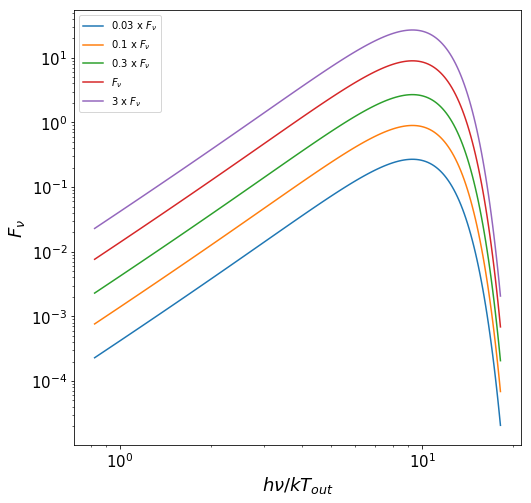

In [20]:
# part 4

Mdot4 = np.zeros(S.shape)
Mdot4[-1] = 1
forw_diff = np.sqrt(R) * nu_R * S
Mdot4[:-1] = 6*np.pi*np.sqrt(R[:-1]) * (forw_diff[1:] - forw_diff[:-1]) /dR[1:]

# temperature
T0 = (np.average(Mdot4) / (Rin**3))**(1/4)
Ts = (Mdot4/R**3)**(1/4)

f = np.linspace(0.1,2.2, len(Ts)) # frequency

# using hν_0 = kT_0 , f = ν/ν_0
B = (f*T0)**3 / (np.exp(f/(Ts/T0))-1) # Planck's law (radiance) from wikipedia
F = 4*np.pi*R**2*f*B

# plotting
plt.figure(1,figsize=(8, 8))

plt.plot(f*T0/Ts[-1], 0.03* F, label='0.03 x $F_ν$')
plt.plot(f*T0/Ts[-1], 0.1* F, label='0.1 x $F_ν$')
plt.plot(f*T0/Ts[-1],  0.3* F, label='0.3 x $F_ν$')
plt.plot(f*T0/Ts[-1],  F, label='$F_ν$')
plt.plot(f*T0/Ts[-1],  3*F, label='3 x $F_ν$')

plt.xlabel('$hν/kT_{out}$', fontsize=18)
plt.ylabel('$F_ν$', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.show()